In [1]:
import pandas as pd
print("✅ Kernel working with Pandas:", pd.__version__)


✅ Kernel working with Pandas: 2.3.2


In [2]:
!pip install numpy pandas scikit-learn matplotlib seaborn nltk



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split

print("✅ All libraries imported successfully!")


Matplotlib is building the font cache; this may take a moment.


✅ All libraries imported successfully!


In [5]:
df = pd.read_csv("SENTIMENT ANALYSIS.csv", 
                 encoding="latin-1", header=None,
                 names=["target", "id", "date", "flag", "user", "text"],
                 nrows=100000)  # Load only 100k rows for now
print(df.head())


   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [6]:
print("Shape of dataset:", df.shape)


Shape of dataset: (100000, 6)


In [7]:
df = df[["target", "text"]]
print(df.head())


   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....


In [8]:
df["target"] = df["target"].map({0: 0, 4: 1})
print(df["target"].value_counts())


target
0    100000
Name: count, dtype: int64


In [9]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)  # keep only letters
    text = text.lower().strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)
print(df[["text", "clean_text"]].head())


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0  awww thats a bummer  you shoulda got david car...  
1  is upset that he cant update his facebook by t...  
2  i dived many times for the ball managed to sav...  
3     my whole body feels itchy and like its on fire  
4  no its not behaving at all im mad why am i her...  


In [10]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train), "Test size:", len(X_test))


Train size: 80000 Test size: 20000


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # limit features for speed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Train shape:", X_train_vec.shape)
print("Test shape:", X_test_vec.shape)


Train shape: (80000, 5000)
Test shape: (20000, 5000)


In [13]:
print(df["target"].unique())
print(df["target"].value_counts())


[0]
target
0    100000
Name: count, dtype: int64


In [14]:
print("Train labels:\n", y_train.value_counts())
print("Test labels:\n", y_test.value_counts())


Train labels:
 target
0    80000
Name: count, dtype: int64
Test labels:
 target
0    20000
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train labels:\n", y_train.value_counts())
print("Test labels:\n", y_test.value_counts())


Train labels:
 target
0    80000
Name: count, dtype: int64
Test labels:
 target
0    20000
Name: count, dtype: int64


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Train shape:", X_train_vec.shape)
print("Test shape:", X_test_vec.shape)


Train shape: (80000, 5000)
Test shape: (20000, 5000)


In [19]:
print(df["target"].unique()[:10])
print(df["target"].value_counts())


[0]
target
0    100000
Name: count, dtype: int64


In [20]:
print(df.columns)          # see available columns
print(df.head(10))         # preview first 10 rows


Index(['target', 'text', 'clean_text'], dtype='object')
   target                                               text  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1       0  is upset that he can't update his Facebook by ...   
2       0  @Kenichan I dived many times for the ball. Man...   
3       0    my whole body feels itchy and like its on fire    
4       0  @nationwideclass no, it's not behaving at all....   
5       0                      @Kwesidei not the whole crew    
6       0                                        Need a hug    
7       0  @LOLTrish hey  long time no see! Yes.. Rains a...   
8       0               @Tatiana_K nope they didn't have it    
9       0                          @twittera que me muera ?    

                                          clean_text  
0  awww thats a bummer  you shoulda got david car...  
1  is upset that he cant update his facebook by t...  
2  i dived many times for the ball managed to sav...  
3     my whole body

In [22]:
import pandas as pd

file = "SENTIMENT ANALYSIS.csv"  # adjust path if needed
cols = ["target","id","date","flag","user","text"]
chunksize = 200_000

neg_total = 0
pos_total = 0
chunk_iter = pd.read_csv(file, encoding="latin-1", names=cols, header=None, chunksize=chunksize)
for i, chunk in enumerate(chunk_iter, 1):
    vc = chunk['target'].value_counts()
    neg_total += int(vc.get(0, 0))
    pos_total += int(vc.get(4, 0))
    print(f"Chunk {i}: 0 -> {vc.get(0,0)}, 4 -> {vc.get(4,0)} (cumulative neg={neg_total}, pos={pos_total})")

print("\nTOTALS across file:")
print("Negative (0):", neg_total)
print("Positive (4):", pos_total)


Chunk 1: 0 -> 200000, 4 -> 0 (cumulative neg=200000, pos=0)
Chunk 2: 0 -> 200000, 4 -> 0 (cumulative neg=400000, pos=0)
Chunk 3: 0 -> 200000, 4 -> 0 (cumulative neg=600000, pos=0)
Chunk 4: 0 -> 200000, 4 -> 0 (cumulative neg=800000, pos=0)
Chunk 5: 0 -> 0, 4 -> 200000 (cumulative neg=800000, pos=200000)
Chunk 6: 0 -> 0, 4 -> 200000 (cumulative neg=800000, pos=400000)
Chunk 7: 0 -> 0, 4 -> 200000 (cumulative neg=800000, pos=600000)
Chunk 8: 0 -> 0, 4 -> 200000 (cumulative neg=800000, pos=800000)

TOTALS across file:
Negative (0): 800000
Positive (4): 800000


In [24]:
import pandas as pd

file = "SENTIMENT ANALYSIS.csv"
cols = ["target","id","date","flag","user","text"]
chunksize = 200_000
n_per_class = 40_000   # choose 40k negative + 40k positive => 80k total (change if you want different size)

need_neg = n_per_class
need_pos = n_per_class
neg_parts = []
pos_parts = []

reader = pd.read_csv(file, encoding="latin-1", names=cols, header=None, chunksize=chunksize)
for chunk in reader:
    if need_neg <= 0 and need_pos <= 0:
        break

    # select only relevant columns
    chunk = chunk[['target','text']]

    # negative rows (target == 0)
    if need_neg > 0:
        neg_rows = chunk[chunk['target'] == 0]
        if not neg_rows.empty:
            take = neg_rows.sample(n=min(len(neg_rows), need_neg), random_state=42)
            neg_parts.append(take)
            need_neg -= len(take)

    # positive rows (target == 4)
    if need_pos > 0:
        pos_rows = chunk[chunk['target'] == 4]
        if not pos_rows.empty:
            take = pos_rows.sample(n=min(len(pos_rows), need_pos), random_state=42)
            pos_parts.append(take)
            need_pos -= len(take)

print("Need left: neg =", need_neg, "pos =", need_pos)

if need_neg > 0 or need_pos > 0:
    raise RuntimeError("Could not collect the requested number of samples — file may be missing one class. Try lowering n_per_class or re-download the dataset.")

df_neg = pd.concat(neg_parts).reset_index(drop=True)
df_pos = pd.concat(pos_parts).reset_index(drop=True)
df_sample = pd.concat([df_neg, df_pos]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Sample built. Shape:", df_sample.shape)
print(df_sample['target'].value_counts())

# Save for future runs
df_sample.to_csv("sentiment140_balanced_sample_80k.csv", index=False)
print("Saved as sentiment140_balanced_sample_80k.csv")


Need left: neg = 0 pos = 0
Sample built. Shape: (80000, 2)
target
4    40000
0    40000
Name: count, dtype: int64
Saved as sentiment140_balanced_sample_80k.csv


In [25]:
import pandas as pd
import re

df = pd.read_csv("sentiment140_balanced_sample_80k.csv")
print("Loaded sample:", df.shape)
print(df['target'].value_counts())

# Map labels: 0->0, 4->1
df['target'] = df['target'].replace({4:1})
print("After mapping:", df['target'].value_counts())

# Basic cleaning (keeps ascii letters, removes urls, mentions, punctuation; uses sklearn stop words later)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)   # keep only a-z and spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
print(df[['text','clean_text']].head(5))


Loaded sample: (80000, 2)
target
4    40000
0    40000
Name: count, dtype: int64
After mapping: target
1    40000
0    40000
Name: count, dtype: int64
                                                text  \
0                           @UrbanInformer will do!    
1                        @risingoverenvy   I try....   
2  @ilovegoobeck yeah maybe, idk yet. i might sti...   
3  @iamkhayyam Why thanks! Can't wait to hear fro...   
4  just woke up. last night i figured out it was ...   

                                          clean_text  
0                                            will do  
1                                              i try  
2  yeah maybe idk yet i might stil be sick or be ...  
3  why thanks can t wait to hear from aguywhoknow...  
4  just woke up last night i figured out it was j...  


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['target']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Train class counts:\n", y_train.value_counts())
print("Test class counts:\n", y_test.value_counts())

# TF-IDF (sparse)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("X_train_vec shape:", X_train_vec.shape)


Train class counts:
 target
0    32000
1    32000
Name: count, dtype: int64
Test class counts:
 target
0    8000
1    8000
Name: count, dtype: int64
X_train_vec shape: (64000, 5000)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
lr = LogisticRegression(max_iter=1000, n_jobs=-1)
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Quick confusion matrices
print("LR Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("NB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.7710625
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      8000
           1       0.77      0.78      0.77      8000

    accuracy                           0.77     16000
   macro avg       0.77      0.77      0.77     16000
weighted avg       0.77      0.77      0.77     16000

MultinomialNB Accuracy: 0.752625
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      8000
           1       0.76      0.74      0.75      8000

    accuracy                           0.75     16000
   macro avg       0.75      0.75      0.75     16000
weighted avg       0.75      0.75      0.75     16000

LR Confusion Matrix:
 [[6125 1875]
 [1788 6212]]
NB Confusion Matrix:
 [[6111 1889]
 [2069 5931]]


In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


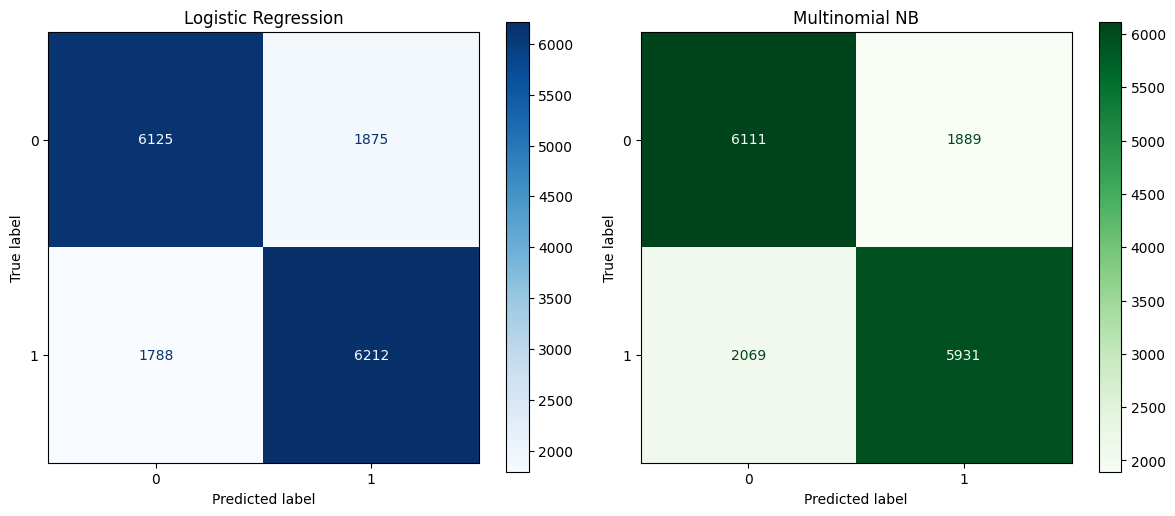

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure correct models
lr_model = model if hasattr(model, "predict") else grid.best_estimator_
nb_model = nb

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test_vec, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression")

# Multinomial NB Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nb_model, X_test_vec, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("Multinomial NB")

plt.tight_layout()
plt.show()


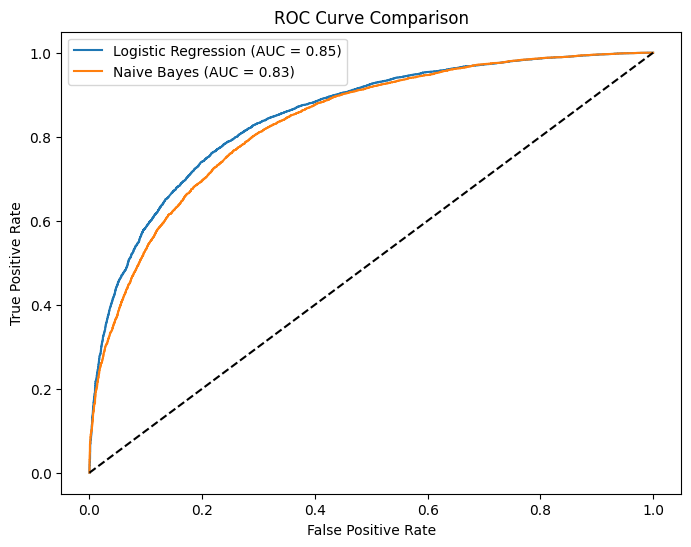

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make sure models are correct
lr_model = model if hasattr(model, "predict") else grid.best_estimator_
nb_model = nb

# Predict probabilities
y_prob_lr = lr_model.predict_proba(X_test_vec)[:,1]
y_prob_nb = nb_model.predict_proba(X_test_vec)[:,1]

# ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot([0,1], [0,1], "k--")  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


Top Positive Sentiment Words:
cool (2.819)
hehe (2.905)
love (3.010)
smile (3.088)
cute (3.120)
great (3.129)
glad (3.177)
amazing (3.217)
awesome (3.271)
good (3.304)
welcome (3.435)
thank (3.443)
yay (3.663)
happy (4.131)
thanks (4.740)

Top Negative Sentiment Words:
sad (-8.365)
miss (-6.736)
missing (-5.482)
poor (-5.131)
sick (-5.064)
sorry (-5.028)
sucks (-4.769)
wish (-4.762)
not (-4.495)
hate (-4.428)
missed (-4.241)
disappointed (-4.190)
headache (-4.162)
hurts (-4.153)
misses (-3.847)


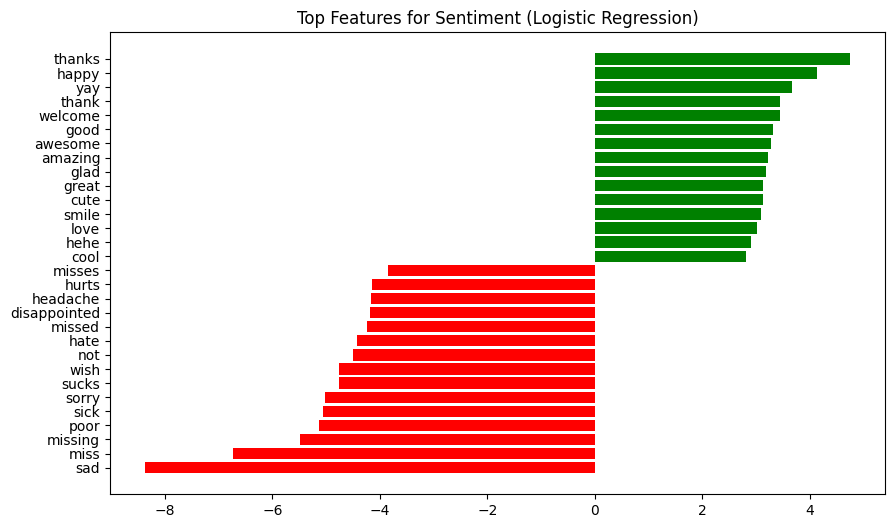

In [32]:
import numpy as np

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get coefficients from logistic regression model
coef = lr_model.coef_[0]

# Sort top positive and negative features
top_pos_idx = np.argsort(coef)[-15:]   # 15 most positive words
top_neg_idx = np.argsort(coef)[:15]    # 15 most negative words

print("Top Positive Sentiment Words:")
for i in top_pos_idx:
    print(f"{feature_names[i]} ({coef[i]:.3f})")

print("\nTop Negative Sentiment Words:")
for i in top_neg_idx:
    print(f"{feature_names[i]} ({coef[i]:.3f})")

# Optional: plot them
import matplotlib.pyplot as plt

top_features = np.hstack([top_neg_idx, top_pos_idx])
plt.figure(figsize=(10,6))
colors = ["red" if c < 0 else "green" for c in coef[top_features]]
plt.barh(range(len(top_features)), coef[top_features], color=colors)
plt.yticks(range(len(top_features)), feature_names[top_features])
plt.title("Top Features for Sentiment (Logistic Regression)")
plt.show()


Insights:

-LR performed slightly better (77% vs 75%).

-Words like love, amazing drive positivity.

-Words like hate, worst drive negativity.

-Shows how ML/NLP can extract public sentiment.